In [44]:
# Paquets

import pandas as pd
import geopandas as gpd
import zipfile
import urllib.request
import os

In [68]:
# Paràmetres

# Directori de treball
WORK_DIR = os.path.abspath(os.getcwd())

# Directori de descàrregues
if not os.path.exists('downloads'):
    os.makedirs('downloads')
if not os.path.exists('tmp'):
    os.makedirs('tmp')
if not os.path.exists('map'):
    os.makedirs('map')

# Enllaços de descàrrega
URL_RONDA_VERDA = 'https://opendata-ajuntament.barcelona.cat/data/dataset/18990935-6b67-49d4-9e92-2171d439ee59/resource/9c0a6e3b-ff5b-43ae-83a5-4219ad7e5e12/download'
URL_CARRIL_BICI = 'https://opendata-ajuntament.barcelona.cat/data/dataset/e3497ea4-0bae-4093-94a7-119df50a8a74/resource/357d14d1-c312-450d-a900-c15c3160a187/download'
URL_CARRIL_BICI_ALTRES_MUNICIPIS = 'https://opendata-ajuntament.barcelona.cat/data/dataset/bcbfe860-7838-468c-b78e-f15d3b9e01f8/resource/b1652bb0-33c1-4c66-81a6-ad46c8504e7e/download'
URL_CARRIL_BICI_CONSTRUCCIO = 'https://opendata-ajuntament.barcelona.cat/data/dataset/edee68e3-5ff1-43d0-b556-12c5d8eb019e/resource/3535ae40-e365-42be-adcf-3a5301948e0b/download'
URL_VIES_CICLABLES = 'https://opendata-ajuntament.barcelona.cat/data/dataset/ae147deb-1b95-4b25-aa3a-b57067f000bc/resource/af4287f7-d1d6-4988-95b0-bf00ff8b31b0/download'
URL_ZONES30_CARRERS = 'https://opendata-ajuntament.barcelona.cat/data/dataset/2258826a-67ba-4429-a500-30472ff6251a/resource/4ae49ce7-df4f-4d76-90e5-bd0e08ba1e4e/download'
URL_CARRERS_PACIFICATS = 'https://opendata-ajuntament.barcelona.cat/data/dataset/335bceee-7988-4899-b2fa-accba6a917c7/resource/d9f9d46c-d55c-419c-93f6-02b3d26beb00/download'
URL_CORREDORS_BICI = 'https://opendata-ajuntament.barcelona.cat/data/dataset/af083278-6873-4a3c-b3d5-68860cc769af/resource/4ee104ac-945e-44c8-8459-b499c9113340/download'


In [71]:
# Funcions

def get_data(url, filename):
    """Descarrega i descomprimeix les dades a la carpeta 'datasets'."""
    try:
        urllib.request.urlretrieve(url, WORK_DIR + '/downloads/' + filename + '.zip')
        zf = zipfile.ZipFile('downloads/' + filename + ".zip")
        zf.extractall(path = 'datasets/' + filename)
        print(filename + " descarregat correctament.")
    except:
        print("Problema descarregant: " + filename)
        
def save_data(gdf, filename):
    """Guarda un geodataframe en format SHP, el comprimeix i el desa a la carpeta 'map'."""
    gdf.to_file('tmp/' + filename + '.shp')
    zf = zipfile.ZipFile('map/' + filename + ".zip", "w", zipfile.ZIP_DEFLATED)
    zf.write('tmp/' + filename + ".dbf")
    zf.write('tmp/' + filename + ".shp")
    zf.write('tmp/' + filename + ".prj")
    zf.write('tmp/' + filename + ".shx")
    zf.write('tmp/' + filename + ".cpg")
    zf.close()
    print(filename + ' guardat correctament.')

In [63]:
# Captura de dades

get_data(URL_CARRIL_BICI, 'CARRIL_BICI')
get_data(URL_CARRIL_BICI_ALTRES_MUNICIPIS, 'CARRIL_BICI_ALTRES_MUNICIPIS')
get_data(URL_CARRIL_BICI_CONSTRUCCIO, 'CARRIL_BICI_CONSTRUCCIO')
get_data(URL_RONDA_VERDA, 'RONDA_VERDA')
get_data(URL_VIES_CICLABLES, 'VIES_CICLABLES')
get_data(URL_ZONES30_CARRERS, 'ZONES30_CARRERS')
get_data(URL_CARRERS_PACIFICATS, 'CARRERS_PACIFICATS')
get_data(URL_CORREDORS_BICI, 'CORREDORS_BICI')


RONDA_VERDA descarregat correctament.
CARRIL_BICI descarregat correctament.
CARRIL_BICI_CONSTRUCCIO descarregat correctament.


## Carrils bici

* Bidireccional en vorera - Permet la circulació de bicicletes en tots dos sentits de la circulació.  Com a exemples d’aquest tipus de carril, tenim l’avinguda Diagonal, des de Francesc Macià al Palau de Pedralbes, o la Gran Via de les Corts Catalanes des de plaça d'Espanya a l'avinguda del Carrilet.
* Unidireccional en vorera - Permet la circulació en un únic sentit. És el que trobem a les tercianes de la Gran Via de les Corts Catalanes, entre la plaça d’Espanya i el carrer d’Aribau, o entre els carrers de Pau Claris i la Marina; i a les tercianes de l'avinguda Diagonal, entre el passeig de Gràcia i Sicília.
* Bidireccional en calçada - Permet la circulació de bicicletes en els dos sentits de la marxa. Normalment se situen a l'esquerra de la via en el sentit de la circulació dels altres vehicles (carrers de Calàbria, Marquès de Sentmenat, Urgell, Sicília, Provença, Teodor Llorente, etcètera). D'aquesta manera, el ciclista que circula en sentit contrari al trànsit rodat va més protegit. Aquest tipus de carril també pot estar situat al mig de la via, com per exemple al passeig de Sant Joan o a l’avinguda del Paral·lel.
* Unidireccional en calçada - Pot ser en el mateix sentit de la circulació (com les de l’avinguda Diagonal, la plaça de Francesc Macià, el passeig de Gràcia o els carrers Diputació i el Consell de Cent), o en sentit contrari, emprat especialment en carrers bici (30) per permetre la circulació de bicicletes en sentit contrari al propi de la via. És el cas de la carretera de la Bordeta o el carrer de la Jota.

In [26]:
# Carril bici

carril_bici = gpd.read_file('datasets/CARRIL_BICI/CARRIL_BICI.shp')
carril_bici['longitud_km'] = carril_bici.length / 1000
carril_bici['tipus'] = 'Carril bici'
carril_bici['TOOLTIP'] = carril_bici['TOOLTIP'].apply(lambda x: x[12:].split(' ',1))
carril_bici['carrer'] = carril_bici['TOOLTIP'].apply(lambda x: x[1])
carril_bici['sentit'] = carril_bici['TOOLTIP'].apply(lambda x: x[0])
carril_bici.drop(columns=['CODI_CAPA','CODI_SUBCA','TOOLTIP'], inplace=True)
carril_bici.head(2)

,ID,geometry,longitud_km,tipus,carrer,sentit
0,GL387150,"LINESTRING (432734.577 4586875.597, 432560.232...",0.178044,Carril bici,Carrer Mossen Quintí Mallofré,unidireccional


In [72]:
save_data(carril_bici, 'CARRIL_BICI')

CARRIL_BICI guardat correctament.


## Vies ciclables

* Zones de vianants amb plataforma única (carrer 10 i 20) - Aquestes zones de prioritat invertida són àrees o carrers on les condicions de circulació de vehicles queden restringides a favor de la circulació de vianants. En aquestes zones, les bicicletes, els patins i els patinets gaudeixen de prioritat sobre la resta de vehicles, però no sobre els vianants, i poden circular en tots dos sentits de la via.
* Carrer Bici (carrer 30) - Són carrers de trànsit pacificat en els quals es promou la circulació de ciclistes, ja que el tràfic d'automòbils té limitada la seva velocitat a 30 km/h. En aquests carrers, les bicicletes han de circular en el sentit de la circulació de la via i tenen prioritat sobre la circulació de la resta de vehicles, però no sobre els vianants.


In [17]:
# Vies ciclables

vies_ciclables = gpd.read_file('VIES_CICLABLES/VIES_CICLABLES.shp')
vies_ciclables = vies_ciclables.to_crs(bcn.crs)
vies_ciclables['longitud_km'] = vies_ciclables.length / 1000
vies_ciclables['carrer'] = vies_ciclables['TOOLTIP'].apply(lambda x: x[14:])
vies_ciclables['sentit'] = 'bidireccional'
vies_ciclables.drop(columns=['CODI_CAPA','CODI_SUBCA','TOOLTIP'], inplace=True)
vies_ciclables.head(10)

,ID,TOOLTIP,geometry,longitud_km
0,GL387131,Carrer ferrocarrils Catalans,"LINESTRING (428457.967 4578985.824, 428414.724...",0.848331
1,GL387132,Carrer Encuny,"LINESTRING (428673.207 4578158.057, 428668.906...",0.390423
2,GL387133,Carrer Alts Forns,"LINESTRING (428121.119 4578916.741, 428319.011...",0.272353
3,GL387134,Carrer de la Foneria,"LINESTRING (428225.932 4579367.022, 428236.291...",0.350659
4,GL387135,Carrer Novell,"LINESTRING (427312.085 4581599.761, 427614.055...",0.507815
5,GL387136,Carrer del Frenopàtic,"LINESTRING (427236.171 4581968.367, 427055.664...",0.190450
6,GL387137,Carrer de Les Corts,"LINESTRING (427107.117 4582040.064, 427137.483...",0.362396
7,GL387138,Carrer Eugeni d'Ors,"LINESTRING (427085.186 4581734.720, 427192.310...",0.115756
8,GL387139,Carrer del Remei,"LINESTRING (427354.260 4581994.515, 427274.129...",0.099037
9,GL387140,Carrer Taquígraf Martí,"LINESTRING (427292.685 4581891.609, 427377.878...",0.091631


## Ronda verda

In [25]:
# Ronda verda

ronda = gpd.read_file('RONDA_VERDA/RONDA_VERDA.shp')
ronda['longitud_km'] = ronda.length / 1000
ronda['carrer'] = ronda['TOOLTIP'].apply(lambda x: x.split(': ',1)[1])
ronda['sentit'] = 'bidireccional'
ronda.drop(columns=['CODI_CAPA','CODI_SUBCA', 'TOOLTIP'], inplace=True)
ronda.head(10)

,ID,geometry,longitud_km,carrer,sentit
0,GL385629,"LINESTRING (430754.622 4589414.253, 430784.587...",6.305380,ronda verda 2,bidireccional
1,GL385569,"LINESTRING (431077.126 4580518.898, 431094.584...",4.058222,Ronda Colom - Moll Barceloneta - Pg. Marítim d...,bidireccional
2,GL385523,"LINESTRING (432148.754 4591653.553, 432249.432...",10.047624,Ronda verda Riu besós,bidireccional
3,GL385125,"LINESTRING (424645.172 4582087.589, 424621.717...",15.606607,Ronda Verda barris de la Marina,bidireccional
4,GL385110,"LINESTRING (435658.775 4586087.257, 435541.111...",1.812804,Ronda Verda enllaç riu Besós - litoral,bidireccional
5,GL385011,"LINESTRING (427637.169 4587318.294, 427576.204...",4.904333,Parc Forestal de la Meca,bidireccional
6,GL384984,"LINESTRING (432815.358 4582172.993, 433069.996...",3.311726,Pg. Marítim de la Mar Bella,bidireccional
7,GL384985,"LINESTRING (424645.172 4582087.589, 424613.133...",13.115061,carretera de les Aigües,bidireccional
8,GL384983,"LINESTRING (429385.403 4588967.559, 429413.740...",2.065922,Coll de la Ventosa - Turó Blau - Turó d'en Cuiàs,bidireccional


In [8]:
# Corredors bici

corredors = gpd.read_file('CORREDORS_BICI/CORREDORS_BICI.shp')
corredors = corredors.to_crs(bcn.crs)
corredors['longitud_km'] = corredors.length / 1000
corredors.drop(columns=['CODI_CAPA','CODI_SUBCA'], inplace=True)
corredors.head(1)

,ID,TOOLTIP,geometry,longitud_km
0,GL411915,Corredors bici,"LINESTRING (428780.552 4580888.193, 428738.287...",0.159959


In [10]:
# Carrers pacificats

carrers_pacificats = gpd.read_file('CARRERS_PACIFICATS/CARRERS_PACIFICATS.shp')
carrers_pacificats = carrers_pacificats.to_crs(bcn.crs)
carrers_pacificats['longitud_km'] = carrers_pacificats.length / 1000
carrers_pacificats.drop(columns=['CODI_CAPA','CODI_SUBCA'], inplace=True)
carrers_pacificats.head(1)

,ID,TOOLTIP,geometry,longitud_km
0,GL386984,Carrers pacificats,"LINESTRING (428886.421 4581537.262, 429275.555...",0.561546


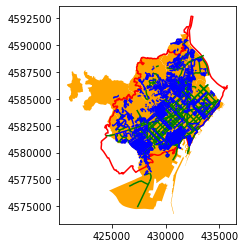

In [35]:
base = bcn.plot(color="orange")
ronda.plot(ax=base, color='red')
carril_bici.plot(ax=base, color='green')
vies_ciclables.plot(ax=base, color='blue')
